# Introduction to Artificial Intelligence: Practice Packet

Welcome to CSE 30124 - Introduction to Artificial Intelligence

This packet is intended to be a simple review of material I will expect familiarity with (due to prereqs!) and a brief introduction to some of the libraries we will be using throughout the course. This packet is not comprehensive, but completing the packet will certainly help you prepare for class.

## Table of Contents
1. **Introduction: Jupyter Notebooks**

3. **Review: Linear Transformations**

4. **Introduction: Probability Distributions**
5. **Introduction: Data Distributions**
6. **Introduction: Function Approximation**
7. **Introduction: Python Libraries for AI**

## 1. Introduction to Jupyter Notebooks


Jupyter Notebooks allow you to write and execute Python code in an interactive environment. 
They consist of cells that can either contain text (Markdown) or code.

### Key Features:
- **Code Cells**: Run Python code interactively.
- **Markdown Cells**: Write text, equations, and explanations using Markdown.
- **Interactivity**: Update code and text dynamically.

Try running the code below by selecting the cell and pressing `Shift + Enter`.


In [1]:
print('Hello, CSE 30124')

Hello, CSE 30124


### Markdown Cells
Markdown cells are used to write and format text. You can use Markdown to add headings, lists, links, images, and even LaTeX equations to your notebook.

Here's an example of a Markdown list:

- **Bold text**: `**Bold text**`
- *Italic text*: `*Italic text*`
- [Link](https://www.example.com): `[Link](https://www.example.com)`

You can also add images using Markdown:

`![Image description](https://www.example.com/image.png)`

Try editing this cell and adding some of your own Markdown elements!

### Code
Now that you know the basics of Markdown and Code cells, it's time for you to create your own pieces of a notebook

1. Create a new Markdown cell below this one. In that cell, write a brief paragraph about what you have used AI for in the past and a mistake you found that it made.
2. Create a new Code cell below your Markdown cell. In that cell, write a Python function that takes a number as input and returns the square of that number.
3. Run your code cell to make sure your function works correctly.

Good luck, and welcome to CSE 30124!

## Key Concepts:

Matrix multiplication is a fundamental operation in linear algebra that can be interpreted as a linear transformation.

- **Linear Transformation**: A function between two vector spaces that preserves vector addition and scalar multiplication.
- **Matrix Representation**: Any linear transformation can be represented as a matrix.
- **Matrix Multiplication**: Applying a matrix to a vector transforms the vector according to the linear transformation represented by the matrix.

## Introduction to Vector Spaces and Subspaces

In mathematics, particularly in linear algebra, the concepts of vector spaces and subspaces are foundational for understanding the structure and behavior of vectors.

### Vector Space:
A **vector space** is a collection of vectors that can be added together and multiplied by scalars (real numbers), satisfying certain axioms. These axioms include associativity, commutativity of addition, existence of an additive identity (zero vector), and distributive properties of scalar multiplication.

#### Real-World Example:
Consider the set of all possible positions of a drone in a 3D space. Each position can be represented as a vector \((x, y, z)\), where \(x\), \(y\), and \(z\) are coordinates in space. The set of all such vectors forms a vector space because you can add two position vectors or scale a position vector by a real number to get another valid position vector.

### Subspace:
A **subspace** is a subset of a vector space that is itself a vector space under the same operations of addition and scalar multiplication. For a subset to be a subspace, it must include the zero vector, be closed under vector addition, and be closed under scalar multiplication.

#### Real-World Example:
Continuing with the drone example, imagine the drone is restricted to fly only at a constant altitude, say \(z = 10\). The set of all position vectors \((x, y, 10)\) forms a subspace of the original 3D vector space. This subspace is essentially a 2D plane within the 3D space, where the drone can move freely in the \(x\) and \(y\) directions but not in the \(z\) direction.

### High Dimensional Data

While it's easy to visualize a drone in 3D space you may be wondering why this matters. In AI, we often aren't operating on data that is in a "real" space. Instead our data is highly abstract.

A classic data set in Machine Learning is the [Iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set). How would you describe a flower to a computer? Representation of data is one of the trickiest and most important things in AI.

One way we could represent a flower in the computer is to give it four different measurements based on attributes of the flower. In the Iris dataset we have four measurements: Petal Length, Petal Width, Sepal Length, and Sepal Width.

![Iris](https://miro.medium.com/v2/resize:fit:875/1*H2UmG5L1I5bzFCW006N5Ag.png)

In this way we can describe each type of iris to the computer, in a way that lets us compare between the three types of irises in the data.

![Iris Classes](https://miro.medium.com/v2/resize:fit:1400/1*f6KbPXwksAliMIsibFyGJw.png)

More importantly however, we could imagine each Iris being a point in 4D space! Each axis of this space corresponds to one of our 4 measurements, and by combining all four measurements used to describe a single flower, we could plot a point in space to represent this flower! This also means that if we could somehow compute the distance between two points in 4D space we could tell how different or similar any two given flowers are.

It's pretty hard to visualize 4D space but it's even harder to visualize 12,288 dimensional space, which is how many dimensions a word has in chatGPT 3. The important take away here is that regardless of what our data set is, we can usually represent it as a collection of points in space which allows us to use linear algebra to learn things about our data.

### First Neural Network

Run the code cell below to see your first neural network in action! We will dive into this example during multiple lectures this semester, but it is a nice visualization of the use of linear algebra to transform input data to allow us to make decisions!

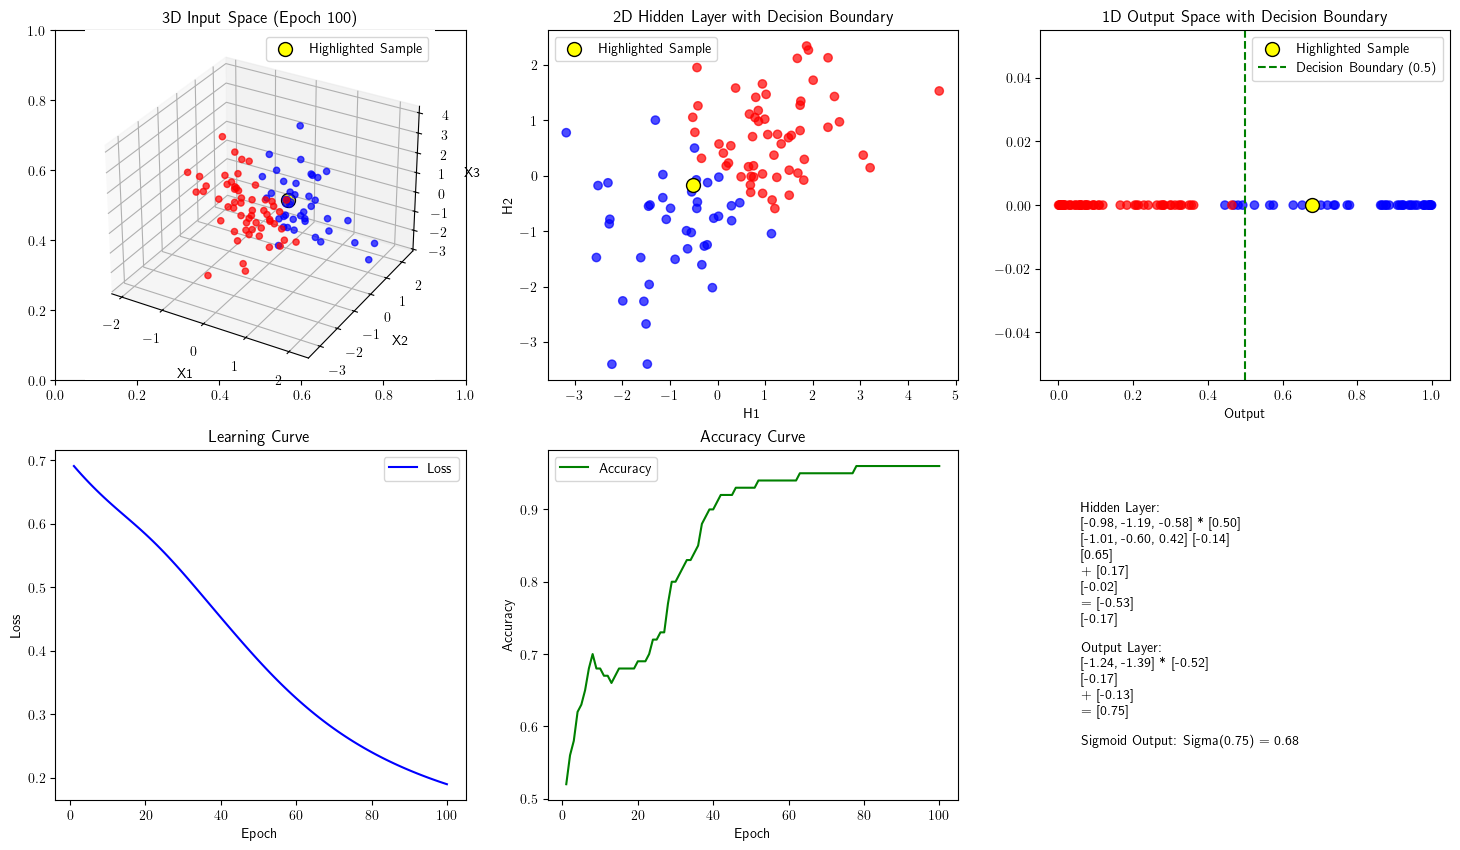

Epoch 100/100, Loss: 0.1898, Accuracy: 0.9600


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import torch
import torch.nn as nn
import torch.optim as optim

plt.rcParams['text.usetex'] = True

# Generate synthetic 3D input data
np.random.seed(42)
n_samples = 100
X = np.random.randn(n_samples, 3)  # 3D input
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Simple binary classification (based on a plane)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(3, 2)  # Reduce 3D to 2D
        self.output = nn.Linear(2, 1)  # Reduce 2D to 1D
    
    def forward(self, x):
        hidden = self.hidden(x)
        out = self.output(hidden)
        return hidden, out

# Initialize the model, loss, and optimizer
model = SimpleNN()
criterion = nn.BCEWithLogitsLoss()  # Binary classification loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Metrics to track
losses = []
accuracies = []

# Training loop
n_epochs = 100
for epoch in range(1, n_epochs + 1):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    hidden_out, output = model(X_tensor)
    loss = criterion(output, y_tensor)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    # Compute accuracy
    with torch.no_grad():
        predictions = torch.sigmoid(output) > 0.5  # Binary predictions
        accuracy = (predictions == y_tensor).float().mean().item()
    
    # Track metrics
    losses.append(loss.item())
    accuracies.append(accuracy)
    
    # Convert outputs to NumPy for visualization
    hidden_out_np = hidden_out.detach().numpy()
    output_np = torch.sigmoid(output).detach().numpy()  # Apply sigmoid for probabilities

    # Select the first sample to show real inputs and outputs
    sample_idx = 0
    x_sample = X[sample_idx]  # Real input
    hidden_sample = hidden_out_np[sample_idx]  # Hidden layer output
    output_sample = output_np[sample_idx][0]  # Final output

    # Visualization setup
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))

    # Create 3D subplot for the input space
    ax_3d = fig.add_subplot(231, projection='3d')
    ax_2d = axs[0, 1]
    ax_1d = axs[0, 2]

    colors = ['red' if label == 0 else 'blue' for label in y]
    
    # 3D space
    ax_3d.scatter(X[:, 0], X[:, 1], X[:, 2], c=colors, alpha=0.7)
    ax_3d.scatter(x_sample[0], x_sample[1], x_sample[2], c='yellow', s=100, edgecolor='black', label='Highlighted Sample')
    ax_3d.set_title(f"3D Input Space (Epoch {epoch})")
    ax_3d.set_xlabel("X1")
    ax_3d.set_ylabel("X2")
    ax_3d.set_zlabel("X3")
    ax_3d.legend()
    
    # 2D hidden space
    ax_2d.scatter(hidden_out_np[:, 0], hidden_out_np[:, 1], c=colors, alpha=0.7)
    ax_2d.scatter(hidden_sample[0], hidden_sample[1], c='yellow', s=100, edgecolor='black', label='Highlighted Sample')
    ax_2d.set_title("2D Hidden Layer with Decision Boundary")
    ax_2d.set_xlabel("H1")
    ax_2d.set_ylabel("H2")
    ax_2d.legend()
    
    # 1D output space
    ax_1d.scatter(output_np[:, 0], np.zeros_like(output_np[:, 0]), c=colors, alpha=0.7)
    ax_1d.scatter(output_sample, 0, c='yellow', s=100, edgecolor='black', label='Highlighted Sample')
    ax_1d.axvline(0.5, color='green', linestyle='--', label='Decision Boundary (0.5)')
    ax_1d.set_title("1D Output Space with Decision Boundary")
    ax_1d.set_xlabel("Output")
    ax_1d.legend()
    
    # Learning curve plot
    axs[1, 0].plot(range(1, epoch + 1), losses, label="Loss", color='blue')
    axs[1, 0].set_title("Learning Curve")
    axs[1, 0].set_xlabel("Epoch")
    axs[1, 0].set_ylabel("Loss")
    axs[1, 0].legend()
    
    # Accuracy plot
    axs[1, 1].plot(range(1, epoch + 1), accuracies, label="Accuracy", color='green')
    axs[1, 1].set_title("Accuracy Curve")
    axs[1, 1].set_xlabel("Epoch")
    axs[1, 1].set_ylabel("Accuracy")
    axs[1, 1].legend()
    
    # Display weights, biases, and computation in LaTeX-style
    axs[1, 2].axis('off')  # Turn off axis
    
    # Highlighted sample (we'll use the first sample for simplicity)
    sample_idx = 0
    x_sample = X[sample_idx]  # Real input for the highlighted sample
    hidden_sample = hidden_out_np[sample_idx]  # Hidden layer output for the sample
    output_sample = output_np[sample_idx][0]  # Final output for the sample

    # Generate the weight matrices and biases as NumPy arrays for computation
    hidden_weights = model.hidden.weight.detach().numpy()
    hidden_biases = model.hidden.bias.detach().numpy()
    output_weights = model.output.weight.detach().numpy()
    output_bias = model.output.bias.detach().numpy()

    # Perform manual computations for display
    hidden_layer_result = hidden_weights @ x_sample + hidden_biases
    output_layer_result = output_weights @ hidden_sample + output_bias

    # Generate plain-text equations with better alignment and spacing
    equation_text = (
        f"Hidden Layer:\n"
        f"  [{hidden_weights[0,0]:.2f}, {hidden_weights[0,1]:.2f}, {hidden_weights[0,2]:.2f}]   *   [{x_sample[0]:.2f}]\n"
        f"  [{hidden_weights[1,0]:.2f}, {hidden_weights[1,1]:.2f}, {hidden_weights[1,2]:.2f}]       [{x_sample[1]:.2f}]\n"
        f"                                      [{x_sample[2]:.2f}]\n"
        f"+ [{hidden_biases[0]:.2f}]\n"
        f"  [{hidden_biases[1]:.2f}]\n"
        f"= [{hidden_layer_result[0]:.2f}]\n"
        f"  [{hidden_layer_result[1]:.2f}]\n\n"
        f"Output Layer:\n"
        f"  [{output_weights[0,0]:.2f}, {output_weights[0,1]:.2f}]   *   [{hidden_sample[0]:.2f}]\n"
        f"                                      [{hidden_sample[1]:.2f}]\n"
        f"+ [{output_bias[0]:.2f}]\n"
        f"= [{output_layer_result[0]:.2f}]\n\n"
        f"Sigmoid Output: Sigma({output_layer_result[0]:.2f}) = {output_sample:.2f}"
    )
    axs[1, 2].axis('off')  # Turn off the subplot axes
    axs[1, 2].text(0.1, 0.5, equation_text, fontsize=10, verticalalignment='center', transform=axs[1, 2].transAxes)

    # Update the visualization
    clear_output(wait=True)
    display(fig)
    plt.close(fig)

    # Print metrics
    print(f"Epoch {epoch}/{n_epochs}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}")

# Final static display
plt.show()

Don't worry if you don't understand in either the code or the visualization, that's the point of this class! By the end of the semester this will be as easy as programming a fractal.

## 3. Introduction: Probability Distributions


Probability distributions describe how probabilities are distributed over events.

### Example: Tossing a Coin
- **Uniform Distribution**: Equal probability for heads and tails (50% each).
- **Normal Distribution**: A bell curve where values are more likely near the mean.

### Practice Question:
Simulate rolling a die 1000 times and plot the frequency of each outcome.


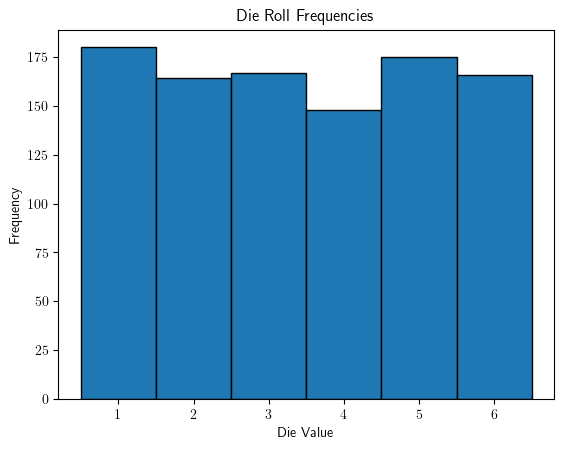

In [5]:

import numpy as np
import matplotlib.pyplot as plt

# Simulate rolling a die
rolls = np.random.randint(1, 7, size=1000)

# Plot the frequency
plt.hist(rolls, bins=np.arange(1, 8)-0.5, edgecolor='black')
plt.title("Die Roll Frequencies")
plt.xlabel("Die Value")
plt.ylabel("Frequency")
plt.xticks(range(1, 7))
plt.show()


This is an example of a uniform distribution, where every event has an equally likely outcome. However a more common distribution is the normal, or gaussian, distribution. Consider the iris dataset above and try and imagine gathering 1,000,000 iris setosas. If you measured all of their petals and then plotted them what you'd likely discover is a normal distribution of petals. There is some sort of "platonic" petal length for a setosa and the flowers don't usually deviate that far from that ideal, average length of petal.

![Petal Lengths](https://ars.els-cdn.com/content/image/3-s2.0-B9780128147610000034-f03-09-9780128147610.jpg)

Imagine you were given a new flower and you wanted to figure out which of the three types of iris it was. What's one thing you could try?

## 4. Introduction: Data Distributions

The idea of data distributions is a very powerful one, but also very important to understand to help mitigate bias in artificial intelligence. 

Much like the idea of a probability distribution, a data distribution is a sort of description of the data you have. A question I asked on the final exam last semester was

> A Norwegian company has a face identification tool that they trained on participants in yoga classes near their offices. They are about to roll out their model globally, do you think this model will work well?

It's important here to consider the distribution of the training data used for the AI model. Was the training data distribution representative of the global distribution? In this question of course not.

[Police Facial Recognition Technology Can’t Tell Black People Apart](https://www.scientificamerican.com/article/police-facial-recognition-technology-cant-tell-black-people-apart/)

This is a colossal issue AI faces, a model is only as good as the data you feed it. Data distrubtions and the representativness of the data you have access to are extremely important to keep in mind as you design models. You can never have all the training data to ever exist. You could never possibly measure every single iris to ever exist but hopefully you can collect a data set that is representative enough to model the underlying "functions" that generate irises.

## 5. Introduction: Function Approximation

This leads into the idea of function approximation. Mostly what we do with machine learning is try and create a model by learning from our training data that approximates the hidden function that generated the training data.

Take for example the relationship between caloric intake and blood sugar. This is an extremely complex relationship but there is some hidden function, known exactly only to God, that maps from caloric intake to blood sugar exactly. However we're only human so all we can do is collect a bunch of samples of caloric intake and blood sugar measurements. Imagine we then plotted these samples:

![Caloric Intake to Blood Sugar](https://machinelearningmastery.com/wp-content/uploads/2021/07/approx1.png)

What we can do is train a model to fit our dataset. If we only had the data points and were given a new caloric intake value we couldn't predict the expected blood sugar. By fitting a model to our data though we can try and approximate the hidden function and if our approximation is good we can mostly predict the expected blood sugar given a new caloric intake.

Much of modern AI can be thought of as just a function approximation task.

[Neural Networks are Function Approximation Algorithms](https://machinelearningmastery.com/neural-networks-are-function-approximators/)

This article goes more in depth if you're interested

## 6. Introduction: Python Libraries

# Essential Python Libraries for AI and Machine Learning

Python has become the de facto language for AI and machine learning, largely due to its powerful ecosystem of specialized libraries. Let's explore the three most fundamental libraries you'll use in your AI journey.

## NumPy: The Foundation of Numerical Computing

NumPy (Numerical Python) is the fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a vast collection of mathematical functions to operate on these arrays.
The code block below provide a number of examples of basic numpy operations. I don't expect you to memorize these or anything but it would be good for you to be at least vaguely familiar with both the syntax and what's possible.

In [ ]:
#always import it as np
import numpy as np

# Create a 1D array
array_1d = np.array([1, 2, 3, 4])
print("1D Array:", array_1d)

# Create a 2D array
array_2d = np.array([[1, 2, 3], [4, 5, 6]])
print("\n2D Array:\n", array_2d)

# Create arrays filled with zeros or ones
zeros = np.zeros((2, 3))
ones = np.ones((2, 3))
print("\nZeros:\n", zeros)
print("\nOnes:\n", ones)

# Create an array with a range of numbers
range_array = np.arange(0, 10, 2)  # start, stop, step
print("\nRange Array:", range_array)

# Create an array with evenly spaced values
linspace_array = np.linspace(0, 1, 5)  # start, stop, number of points
print("\nLinspace Array:", linspace_array)

array_a = np.array([1, 2, 3])
array_b = np.array([4, 5, 6])

# Element-wise addition
print("Addition:", array_a + array_b)

# Element-wise multiplication
print("Multiplication:", array_a * array_b)

# Broadcasting: Adding a scalar to an array
print("Add scalar:", array_a + 10)

# Element-wise square
print("Square:", array_a ** 2)

array = np.array([10, 20, 30, 40, 50])

# Indexing
print("First element:", array[0])

# Slicing
print("Slice (1:4):", array[1:4])

# Modifying elements
array[0] = 99
print("Modified Array:", array)

array = np.arange(1, 10)  # Array with values 1 to 9
reshaped = array.reshape((3, 3))  # Reshape to 3x3
print("Original Array:", array)
print("\nReshaped Array:\n", reshaped)

array = np.array([1, 2, 3, 4, 5])

# Sum of elements
print("Sum:", np.sum(array))

# Mean and standard deviation
print("Mean:", np.mean(array))
print("Standard Deviation:", np.std(array))

# Maximum and minimum
print("Max:", np.max(array))
print("Min:", np.min(array))

# Random numbers between 0 and 1
random_array = np.random.rand(3, 3)
print("Random Array:\n", random_array)

# Random integers
random_ints = np.random.randint(0, 10, (2, 3))  # range [0, 10), shape (2, 3)
print("\nRandom Integers:\n", random_ints)

Numpy is significantly faster than basic python for mathematical, matrix, and vector operations

In [10]:
import numpy as np
import time

# Generate a large list and a NumPy array with the same values
size = 10**6  # 1 million elements
python_list = list(range(size))
numpy_array = np.arange(size)

# Pure Python: Compute the square of each element
start_time = time.time()
python_result = [x ** 2 for x in python_list]
python_time = time.time() - start_time
print(f"Pure Python took {python_time:.5f} seconds")

# NumPy: Compute the square of each element
start_time = time.time()
numpy_result = numpy_array ** 2
numpy_time = time.time() - start_time
print(f"NumPy took {numpy_time:.5f} seconds")

# Print the speedup
speedup = python_time / numpy_time
print(f"NumPy is approximately {speedup:.2f}x faster!")

Pure Python took 0.21589 seconds
NumPy took 0.00350 seconds
NumPy is approximately 61.68x faster!


### Pandas: Data Manipulation and Analysis
Pandas provides high-performance, easy-to-use data structures and tools for working with structured data. It's particularly good at handling tabular data with heterogeneously-typed columns. It's sort of like a super advanced dictionary crossed with a spread sheet

In [12]:
import pandas as pd

# Create a DataFrame from a dictionary
data = {
    "Name": ["Alice", "Bob", "Charlie", "David"],
    "Age": [25, 30, 35, 40],
    "Score": [85, 90, 95, 100],
}

df = pd.DataFrame(data)
print("DataFrame:\n", df)

# Access a single column
print("Names:\n", df["Name"])

# Add a new column
df["Pass"] = df["Score"] >= 90
print("\nUpdated DataFrame:\n", df)

# Filter rows where 'Age' is greater than 30
filtered_df = df[df["Age"] > 30]
print("\nFiltered Rows:\n", filtered_df)

# Using a for loop to calculate grades
grades = []
for score in df["Score"]:
    if score >= 90:
        grades.append("A")
    else:
        grades.append("B")
df["Grade"] = grades
print("Grades with loop:\n", df)

# Vectorized operation using pandas `apply` and lambda
df["Grade"] = df["Score"].apply(lambda x: "A" if x >= 90 else "B")
print("\nGrades with Pandas:\n", df)

# Group data by 'Grade' and calculate average age
grouped = df.groupby("Grade")["Age"].mean()
print("\nAverage Age by Grade:\n", grouped)

DataFrame:
       Name  Age  Score
0    Alice   25     85
1      Bob   30     90
2  Charlie   35     95
3    David   40    100
Names:
 0      Alice
1        Bob
2    Charlie
3      David
Name: Name, dtype: object

Updated DataFrame:
       Name  Age  Score   Pass
0    Alice   25     85  False
1      Bob   30     90   True
2  Charlie   35     95   True
3    David   40    100   True

Filtered Rows:
       Name  Age  Score  Pass
2  Charlie   35     95  True
3    David   40    100  True
Grades with loop:
       Name  Age  Score   Pass Grade
0    Alice   25     85  False     B
1      Bob   30     90   True     A
2  Charlie   35     95   True     A
3    David   40    100   True     A

Grades with Pandas:
       Name  Age  Score   Pass Grade
0    Alice   25     85  False     B
1      Bob   30     90   True     A
2  Charlie   35     95   True     A
3    David   40    100   True     A

Average Age by Grade:
 Grade
A    35.0
B    25.0
Name: Age, dtype: float64


In [11]:
import pandas as pd
import numpy as np
import time

# Create a large DataFrame
size = 10**6
data = pd.DataFrame({
    "A": np.random.rand(size),
    "B": np.random.rand(size),
})

# Python loop: Add two columns
start_time = time.time()
data["C_loop"] = [data["A"][i] + data["B"][i] for i in range(size)]
python_time = time.time() - start_time
print(f"Python loop took {python_time:.5f} seconds")

# Pandas vectorized operation
start_time = time.time()
data["C_vectorized"] = data["A"] + data["B"]
pandas_time = time.time() - start_time
print(f"Pandas vectorized operation took {pandas_time:.5f} seconds")

# Speedup
speedup = python_time / pandas_time
print(f"Pandas is approximately {speedup:.2f}x faster!")

Python loop took 5.89706 seconds
Pandas vectorized operation took 0.00349 seconds
Pandas is approximately 1690.18x faster!


### sklearn

Scikit-learn is the most popular machine learning library in Python. It provides a consistent interface for a wide range of machine learning algorithms. We'll spend a lot more time looking at and using sklearn during Unit 02 but below is an example of using a model on the iris dataset to predict what type of iris a new flower is

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## E-Signature (5 pts.)

Type your name here: